# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings 
warnings.filterwarnings('ignore')


## 1. Read the data in a quarterly Time Series Format.

In [4]:
data = pd.read_csv('ApplianceShipments.csv')

In [5]:
data

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123
5,Q2,1986,4522
6,Q3,1986,4657
7,Q4,1986,4030
8,Q1,1987,4493
9,Q2,1987,4806


In [10]:
quart_to_month ={"Q1" : 1, "Q2" : 4, "Q3" : 7, "Q4" : 10}

In [11]:
data['Period'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Quarter'].map(quart_to_month).astype(str))

In [12]:
data

,Quarter,Year,Shipments,Period
0,Q1,1985,4009,1985-01-01
1,Q2,1985,4321,1985-04-01
2,Q3,1985,4224,1985-07-01
3,Q4,1985,3944,1985-10-01
4,Q1,1986,4123,1986-01-01
5,Q2,1986,4522,1986-04-01
6,Q3,1986,4657,1986-07-01
7,Q4,1986,4030,1986-10-01
8,Q1,1987,4493,1987-01-01
9,Q2,1987,4806,1987-04-01


In [13]:
df = data.copy()

In [15]:
df.drop(columns=['Quarter', "Year"], inplace = True)

In [17]:
df.set_index('Period', inplace= True)

## 2. Plot the Time Series data.

<Axes: xlabel='Period'>

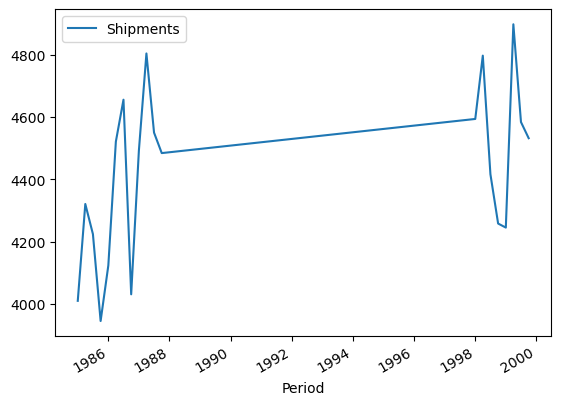

In [18]:
df.plot()

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [22]:
df.groupby(df.index.quarter)['Shipments'].describe()

,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
1,5.0,4293.0,246.507606,4009.0,4123.0,4245.0,4493.0,4595.0
2,5.0,4669.6,240.697528,4321.0,4522.0,4799.0,4806.0,4900.0
3,5.0,4486.8,170.784074,4224.0,4417.0,4551.0,4585.0,4657.0
4,5.0,4250.0,263.350527,3944.0,4030.0,4258.0,4485.0,4533.0


## 3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

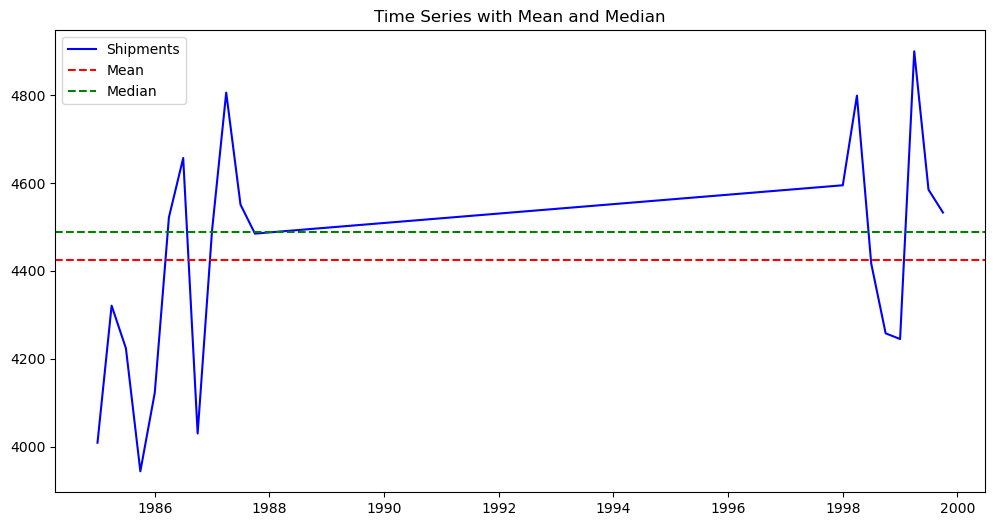

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Shipments'], label='Shipments', color='blue')
plt.axhline(df['Shipments'].mean(), color='red', linestyle='--', label='Mean')
plt.axhline(df['Shipments'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title("Time Series with Mean and Median")
plt.show()

## 4. Plot a quarterly comparison of the shipments using a barplot.

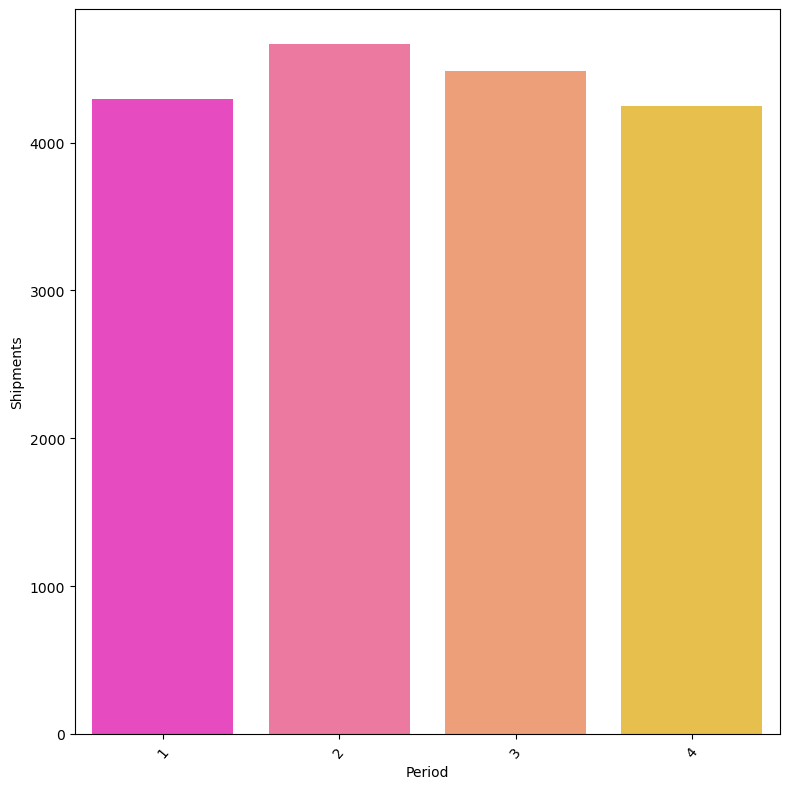

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(data = df, x = df.index.quarter , y = 'Shipments', estimator = np.mean, ci = None, palette='spring')
plt.xticks(rotation = 50)
plt.tight_layout()
plt.show()

## 5. Plot the year on year quarterly comparison of the shipments.

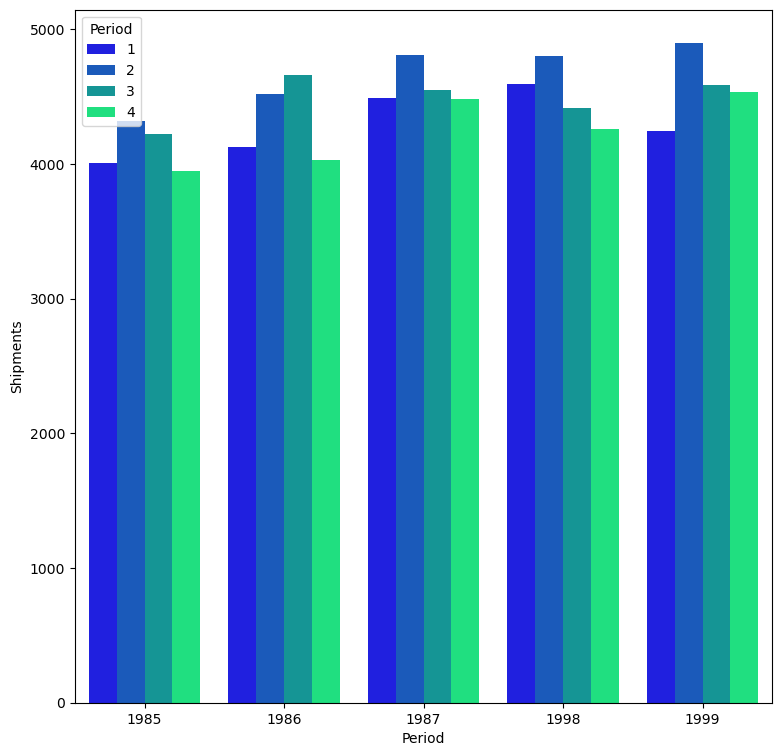

In [33]:
plt.figure(figsize=(9,9))
sns.barplot(x = df.index.year, y = df['Shipments'], hue = df.index.quarter, estimator= np.mean, palette='winter')
plt.show()


## 6. Plot the distribution plot for quarterly comparison of the shipments.

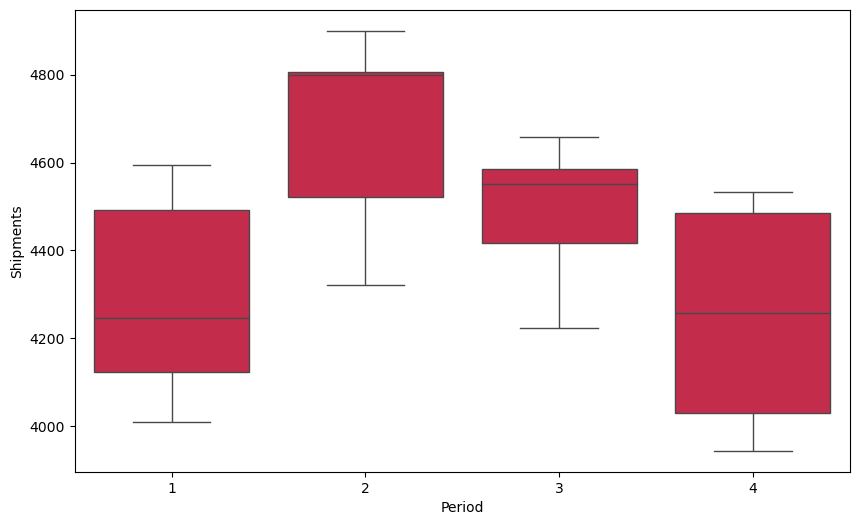

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df.index.quarter, y = df['Shipments'], color = 'crimson')
plt.show()

## 7. Decompose the data and check the trend, seasonality and the irregular/residual/error component.

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

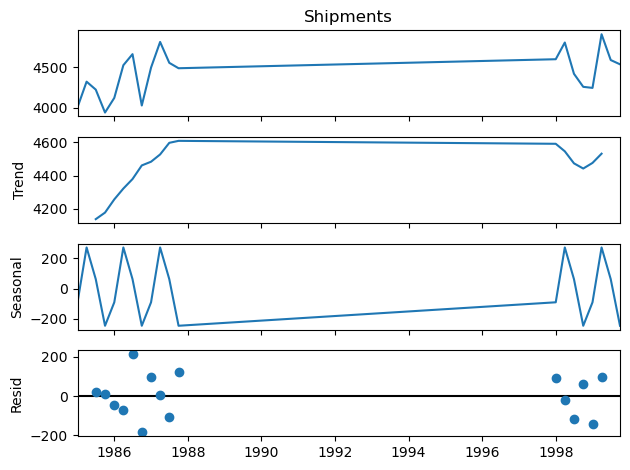

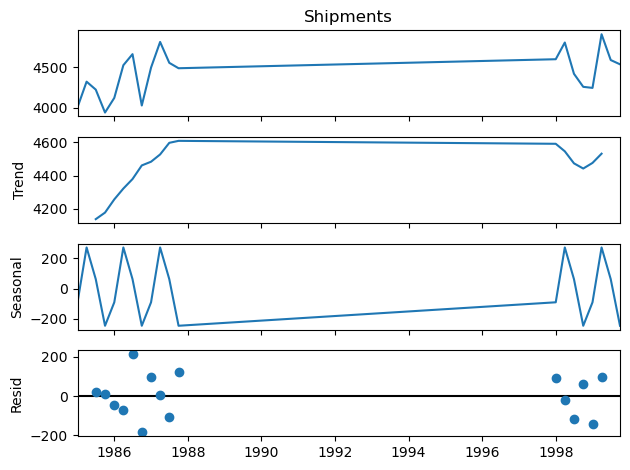

In [35]:
dec = seasonal_decompose(df['Shipments'], model= 'additive', period=4)
dec.plot()

Go ahead and play around with the data to understand the nuances. Try to perform different types of visualizations in order for better understanding of the data. 

Happy Learning!

# END